In [1]:
import xml.etree.ElementTree as ET
import os
import numpy as np
import subprocess
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
from random import randrange


In [2]:
ls benchmarks/architecture/

ls: cannot access 'benchmarks/architecture/': No such file or directory


In [3]:
bm_folder = '../benchmarks/'
file_name = 'sparcT1_core_stratixiv_arch_timing'
path_blif = os.path.join(bm_folder, 'blif',file_name +'.blif')
path_graphfiles_folder = os.path.join(bm_folder,'graphfile' ,file_name)
arch_name = 'stratixiv_arch.timing.xml'
path_arch_folder = os.path.join(bm_folder,'architecture' ,arch_name)
hmetis = 'hmetis-1.5-linux/hmetis'
if not os.path.isdir(path_graphfiles_folder):
    os.mkdir(path_graphfiles_folder)

tree = ET.parse(path_arch_folder)
root = tree.getroot()

In [4]:
for child in root:
    print(child.tag, child.attrib)

models {}
tiles {}
layout {}
device {}
switchlist {}
segmentlist {}
directlist {}
complexblocklist {}
switchblocklist {}


In [5]:
attributes = set([])
arch_models = root.findall('.//models/model')
for model in root.findall('.//models/model'):
#     print(elem.attrib.get('name'))
    for ports in model:
        for port in ports:
            attributes = attributes.union(set(port.attrib.keys()))
attributes

{'clock', 'combinational_sink_ports', 'is_clock', 'name'}

In [6]:
len(arch_models)

196

# Subckt 49843: sparc_ifu:ifu|bw_r_idct:ict|bw_r_idct_array:ictag_ary_01|altsyncram:array_rtl_0|altsyncram_6dp1:auto_generated|ram_block1a2~I 
.subckt stratixiv_ram_block.opmode{dual_port}.output_type{comb}.port_a_address_width{7}.port_b_address_width{7} \
    portbaddr[0]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[5] \
    portbaddr[1]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[6] \
    portbaddr[2]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[7] \
    portbaddr[3]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[8] \
    portbaddr[4]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[9] \
    portbaddr[5]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[10] \
    portbaddr[6]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[11] \
    portawe=sparc_ifu:ifu|bw_r_idct:ict|we[1]~3 \
    portbre=vcc \
    portaaddr[0]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[5] \
    portaaddr[1]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[6] \
    portaaddr[2]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[7] \
    portaaddr[3]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[8] \
    portaaddr[4]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[9] \
    portaaddr[5]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[10] \
    portaaddr[6]=sparc_ifu:ifu|bw_r_icd:icd|wr_index0[11] \
    ena1=sparc_ifu:ifu|bw_r_idct:ict|we[1]~3 \
    ena0=sparc_ifu:ifu|bw_r_idct:ict|we[1]~3 \
    ena3=vcc \
    ena2=vcc \
    clk_portain=gclk \
    clk_portbin=gclk \
    portadatain=sparc_ifu:ifu|sparc_ifu_ifqdp:ifqdp|dff_s:wraddr_reg|q[10] \
    portbdataout=sparc_ifu:ifu|bw_r_idct:ict|bw_r_idct_array:ictag_ary_01|altsyncram:array_rtl_0|altsyncram_6dp1:auto_generated|ram_block1a2


In [7]:
names = []
subckt = 'stratixiv_lcell_comb'
for model in root.findall('.//models/model'):
    if subckt in model.attrib.get('name'):
        
        for ports in model:
            print(ports.tag, 'ports')
            for port in ports:
#                 for key, val in port.attrib.items():
#                     print(key, val)
                print(port.tag, port.attrib)


input_ports ports
port {'name': 'dataa', 'combinational_sink_ports': 'combout sumout cout shareout'}
port {'name': 'datab', 'combinational_sink_ports': 'combout sumout cout shareout'}
port {'name': 'datac', 'combinational_sink_ports': 'combout sumout cout shareout'}
port {'name': 'datad', 'combinational_sink_ports': 'combout sumout cout shareout'}
port {'name': 'datae', 'combinational_sink_ports': 'combout'}
port {'name': 'dataf', 'combinational_sink_ports': 'combout sumout cout'}
port {'name': 'datag', 'combinational_sink_ports': 'combout'}
port {'name': 'cin', 'combinational_sink_ports': 'sumout cout'}
port {'name': 'sharein', 'combinational_sink_ports': 'sumout cout'}
output_ports ports
port {'name': 'combout'}
port {'name': 'sumout'}
port {'name': 'cout'}
port {'name': 'shareout'}


## circuit

In [8]:
file1 = open(path_blif, 'r')
lines = file1.readlines()

### 1) parse models (except for main)

In [9]:
# Strips the newline character
models = []
index1 = 0
for index2, line in enumerate(lines):
    if '.model' in line:
        models.append(lines[index1:index2])
        index1 = index2
models.append(lines[index1:])
main_model = models[1]
subckt_models = models[2:]

In [10]:
subckt_model = subckt_models[0]
subckt_model[0].split()[1]

for subckt_model in subckt_models:
    subckt_name = subckt_model[0].split()[1]
    for arch_model in arch_models:
        if subckt_name == arch_model.attrib.get('name'):
            arch_model.attrib.get('name')

In [11]:
class subckt:
    def __init__(self, name, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        self.name = name
    
    

In [12]:
subckts = {}

for subckt_model in subckt_models:
    input_line, output_line = False, False
    inputs = []
    outputs = []
    for line in subckt_model:
        if '.model' in line:
            name = line.split()[1]
        if '.inputs' in line:
            input_line = True
            output_line = False
        elif '.outputs' in line:
            input_line = False
            output_line = True
        elif line[0] == '.':
            input_line = False
            output_line = False
        elif input_line:
            inputs.append(line.split()[0])
        elif output_line:
            outputs.append(line.split()[0])
    
    subckts[name] = subckt(name, inputs, outputs)
    

In [13]:
subckts[list(subckts)[0]].inputs

['devpor',
 'devclrn',
 'aclr[0]',
 'aclr[1]',
 'aclr[2]',
 'aclr[3]',
 'ena[0]',
 'ena[1]',
 'ena[2]',
 'ena[3]',
 'signb',
 'signa',
 'datad[0]',
 'datad[1]',
 'datad[2]',
 'datad[3]',
 'datad[4]',
 'datad[5]',
 'datad[6]',
 'datad[7]',
 'datad[8]',
 'datad[9]',
 'datad[10]',
 'datad[11]',
 'datad[12]',
 'datad[13]',
 'datad[14]',
 'datad[15]',
 'datad[16]',
 'datad[17]',
 'datad[18]',
 'datad[19]',
 'datad[20]',
 'datad[21]',
 'datad[22]',
 'datad[23]',
 'datad[24]',
 'datad[25]',
 'datad[26]',
 'datad[27]',
 'datad[28]',
 'datad[29]',
 'datad[30]',
 'datad[31]',
 'datad[32]',
 'datad[33]',
 'datad[34]',
 'datad[35]',
 'datac[0]',
 'datac[1]',
 'datac[2]',
 'datac[3]',
 'datac[4]',
 'datac[5]',
 'datac[6]',
 'datac[7]',
 'datac[8]',
 'datac[9]',
 'datac[10]',
 'datac[11]',
 'datac[12]',
 'datac[13]',
 'datac[14]',
 'datac[15]',
 'datac[16]',
 'datac[17]',
 'datac[18]',
 'datac[19]',
 'datac[20]',
 'datac[21]',
 'datac[22]',
 'datac[23]',
 'datac[24]',
 'datac[25]',
 'datac[26]',
 'd

In [14]:
subckts['stratixiv_ram_block.opmode{dual_port}.output_type{comb}.port_a_address_width{7}.port_b_address_width{7}'].inputs

['portbaddr[0]',
 'portbaddr[1]',
 'portbaddr[2]',
 'portbaddr[3]',
 'portbaddr[4]',
 'portbaddr[5]',
 'portbaddr[6]',
 'portbaddrstall',
 'portawe',
 'clk_portbout',
 'portbre',
 'portaaddr[0]',
 'portaaddr[1]',
 'portaaddr[2]',
 'portaaddr[3]',
 'portaaddr[4]',
 'portaaddr[5]',
 'portaaddr[6]',
 'portaaddrstall',
 'clk_portaout',
 'ena1',
 'ena0',
 'ena3',
 'ena2',
 'clk_portain',
 'portabyteenamasks[0]',
 'portabyteenamasks[1]',
 'portabyteenamasks[2]',
 'portabyteenamasks[3]',
 'portabyteenamasks[4]',
 'portabyteenamasks[5]',
 'portabyteenamasks[6]',
 'portabyteenamasks[7]',
 'clk_portbin',
 'clr0',
 'clr1',
 'portadatain']

In [15]:
for subckt in subckts.values():
    print(subckt.name, len(subckt.inputs), len(subckt.outputs))

stratixiv_mac_out.opmode{36_bit_multiply}.input_type{comb}.output_type{comb} 156 73
stratixiv_mac_mult.input_type{comb} 48 54
stratixiv_ram_block.opmode{rom}.output_type{comb}.port_a_address_width{8} 18 1
stratixiv_ram_block.opmode{dual_port}.output_type{comb}.port_a_address_width{4}.port_b_address_width{4} 31 4
stratixiv_ram_block.opmode{dual_port}.output_type{comb}.port_a_address_width{5}.port_b_address_width{5} 33 4
stratixiv_ram_block.opmode{dual_port}.output_type{comb}.port_a_address_width{7}.port_b_address_width{7} 37 4
stratixiv_ram_block.opmode{dual_port}.output_type{comb}.port_a_address_width{8}.port_b_address_width{8} 39 4
dffeas 11 1
stratixiv_lcell_comb 9 4


In [16]:
new_main_model = []

new_line_split = []
for line in main_model:
    line_split = line.split()
    if line_split != [] and (line_split[-1] == '\\'):
        new_line_split.extend(line_split[:-1])
#     elif line_split != [] and (line_split[0]=='.names' or line_split[0] == '0' or line_split[0] == '1'):
#         new_line_split.extend(line_split)
    else:
        new_line_split.extend(line_split)
        new_line = ' '.join(new_line_split)
        new_main_model.append(new_line_split)
        new_line_split = []
new_main_model

[['.model', 'sparc'],
 ['.inputs',
  'pcx_spc_grant_px[0]',
  'pcx_spc_grant_px[1]',
  'pcx_spc_grant_px[2]',
  'pcx_spc_grant_px[3]',
  'pcx_spc_grant_px[4]',
  'cpx_spc_data_rdy_cx2',
  'cpx_spc_data_cx2[0]',
  'cpx_spc_data_cx2[1]',
  'cpx_spc_data_cx2[2]',
  'cpx_spc_data_cx2[3]',
  'cpx_spc_data_cx2[4]',
  'cpx_spc_data_cx2[5]',
  'cpx_spc_data_cx2[6]',
  'cpx_spc_data_cx2[7]',
  'cpx_spc_data_cx2[8]',
  'cpx_spc_data_cx2[9]',
  'cpx_spc_data_cx2[10]',
  'cpx_spc_data_cx2[11]',
  'cpx_spc_data_cx2[12]',
  'cpx_spc_data_cx2[13]',
  'cpx_spc_data_cx2[14]',
  'cpx_spc_data_cx2[15]',
  'cpx_spc_data_cx2[16]',
  'cpx_spc_data_cx2[17]',
  'cpx_spc_data_cx2[18]',
  'cpx_spc_data_cx2[19]',
  'cpx_spc_data_cx2[20]',
  'cpx_spc_data_cx2[21]',
  'cpx_spc_data_cx2[22]',
  'cpx_spc_data_cx2[23]',
  'cpx_spc_data_cx2[24]',
  'cpx_spc_data_cx2[25]',
  'cpx_spc_data_cx2[26]',
  'cpx_spc_data_cx2[27]',
  'cpx_spc_data_cx2[28]',
  'cpx_spc_data_cx2[29]',
  'cpx_spc_data_cx2[30]',
  'cpx_spc_data_cx

In [17]:
# collect .inputs, .outputs, .names, .latch, .subckt
inputs_main = None
outputs_main = None
names_main = []
latches_main = []
subckts_main = []

for split_line in new_main_model:
    if split_line == []:
        pass
    elif split_line[0] == '.inputs':
        inputs_main = split_line
    elif split_line[0] == '.outputs':
        outputs_main = split_line
    elif split_line[0] == '.names': 
        names_main.append(split_line)
    elif split_line[0] == '.latch':
        latches_main.append(split_line)
    elif split_line[0] == '.subckt':
        subckts_main.append(split_line)

In [18]:
subckts_main

[['.subckt',
  'dffeas',
  'd=sparc_ifu:ifu|sparc_ifu_fcl:fcl|dff_s:thrf_reg|q[0]',
  'clk=gclk',
  'q=sparc_ifu:ifu|sparc_ifu_fcl:fcl|dff_s:thrd_reg|q[0]'],
 ['.subckt',
  'dffeas',
  'd=sparc_ifu:ifu|sparc_ifu_fcl:fcl|flush_pipe_w',
  'clk=gclk',
  'q=sparc_ifu:ifu|sparc_ifu_fcl:fcl|dff_s:fp_ff|q[0]'],
 ['.subckt',
  'stratixiv_lcell_comb',
  'datab=sparc_ifu:ifu|sparc_ifu_fcl:fcl|dffr_s:thre2_reg|q[3]',
  'dataa=sparc_ifu:ifu|sparc_ifu_fcl:fcl|dff_s:thrw_reg|q[3]',
  'combout=sparc_ifu:ifu|sparc_ifu_fcl:fcl|thr_match_ew~0'],
 ['.subckt',
  'dffeas',
  'd=cmp_grst_l',
  'clk=gclk',
  'q=bw_clk_cl_sparc_cmp:spc_hdr|cluster_header:I0|cluster_grst_l'],
 ['.subckt',
  'dffeas',
  'd=bw_clk_cl_sparc_cmp:spc_hdr|cluster_header:I0|cluster_grst_l',
  'clrn=cmp_arst_l',
  'clk=gclk',
  'q=sparc_ffu:ffu|sparc_ffu_ctl:ctl|dffrl_async:rstff|q[0]'],
 ['.subckt',
  'dffeas',
  'd=sparc_ifu:ifu|sparc_ifu_fcl:fcl|dff_s:thrd_reg|q[0]',
  'sclr=sparc_ffu:ffu|sparc_ffu_ctl:ctl|dffrl_async:rstff|q[0]',


## I/O count

In [19]:
pd.DataFrame()

""


In [20]:
subckt_collection = [] #[[subckt_name, inputs, clk, outputs]]
circuit_atoms = []
counts = []
for subckt in subckts_main:
        #subckt first: '.subckt', second: 'name', then 'IO_name=netname'
        name = subckt[1]
        ins = {}
        clks = []
        outs = {}
        for io_net in subckt[2:]:
            port, net = io_net.split('=')
            if port in subckts[name].inputs:
                if 'clk' in port:
                    clks.append(port)
                else:
                    ins[port] = net
            elif port in subckts[name].outputs:
                outs[port]= net
        
        input_ports = list(ins)
        output_ports = list(outs)
        circuit_atoms.append([name, ins, clks, outs])
        if not [name, input_ports, clks, output_ports] in subckt_collection:
            subckt_collection.append([name, input_ports, clks, output_ports])
            counts.append(1)
        else:
            i = subckt_collection.index([name, input_ports, clks, output_ports])
            counts[i] += 1

In [21]:
for subckt, count in zip(subckt_collection, counts):
    name = subckt[0]
    inputs = subckt[1]
    outputs = subckt[3]
    if name == 'stratixiv_lcell_comb' and 'cin' in inputs and not 'cout' in outputs:
        print(count, subckt)

1 ['stratixiv_lcell_comb', ['cin', 'dataf'], [], ['sumout']]
5 ['stratixiv_lcell_comb', ['sharein', 'cin', 'datad', 'datac'], [], ['sumout']]
6 ['stratixiv_lcell_comb', ['cin', 'datad'], [], ['sumout']]
8 ['stratixiv_lcell_comb', ['cin'], [], ['sumout']]
2 ['stratixiv_lcell_comb', ['cin', 'dataf', 'datad', 'dataa'], [], ['sumout']]


### Carry chains

In [22]:
# net --> atoms
carry_chain_nets = {}
for atom_index, atom in enumerate(circuit_atoms):
    name, ins, clk, outs = atom
    if 'cin' in ins:
        net = ins['cin']
        if not net in carry_chain_nets:
            carry_chain_nets[net] = set()
        carry_chain_nets[net].add(atom_index)
    if 'cout' in outs:
        net = outs['cout']
        if not net in carry_chain_nets:
            carry_chain_nets[net] = set()
        carry_chain_nets[net].add(atom_index)
#     if 'sharein' in ins:
#         net = ins['sharein']
#         if not net in carry_chain_nets:
#             carry_chain_nets[net] = set()
#         carry_chain_nets[net].add(atom_index)
#     if 'shareout' in outs:
#         net = outs['shareout']
#         if not net in carry_chain_nets:
#             carry_chain_nets[net] = set()
#         carry_chain_nets[net].add(atom_index)

In [23]:
carry_chains = []
start_atom_indices = carry_chain_nets['gnd']
carry_chain_nets.pop('gnd')
for start_atom_index in start_atom_indices:
    carry_chain = [start_atom_index]
    atom_index = start_atom_index
    atom_found = True
    while atom_found:
        atom_found = False
        for net, atom_indices in carry_chain_nets.items():
            if atom_index in atom_indices:
                atom_indices.remove(atom_index)
                atom_index = list(atom_indices)[0]
                atom_indices.remove(atom_index)
                carry_chain.append(atom_index)
                selected_net = net
                atom_found = True
        if atom_found:
            carry_chain_nets.pop(selected_net)
            
    carry_chains.append(carry_chain)

In [24]:
carry_chain = carry_chains[1]
for atom_index in carry_chain:
    for e in circuit_atoms[atom_index]:
        print(e)

stratixiv_lcell_comb
{'cin': 'gnd', 'dataf': 'tlu:tlu|tlu_pib:tlu_pib|mux4ds:mux_picl_evq_din|Mux2~3', 'datad': 'tlu:tlu|tlu_pib:tlu_pib|mux4ds:mux_picl_cnt_din|Mux32~0', 'datac': 'tlu:tlu|tlu_pib:tlu_pib|mux4ds:mux_picl_evq_din|Mux2~1', 'datab': 'tlu:tlu|tlu_pib:tlu_pib|dffr_s:dffr_pic_update_sel_ctr|q[1]', 'dataa': 'tlu:tlu|tlu_pib:tlu_pib|dffr_s:dffr_pic_update_sel_ctr|q[0]'}
[]
{'cout': 'tlu:tlu|tlu_pib:tlu_pib|tlu_addern_32:picl_adder|Add0~2', 'sumout': 'tlu:tlu|tlu_pib:tlu_pib|tlu_addern_32:picl_adder|Add0~1'}
stratixiv_lcell_comb
{'cin': 'tlu:tlu|tlu_pib:tlu_pib|tlu_addern_32:picl_adder|Add0~2', 'dataf': 'tlu:tlu|tlu_pib:tlu_pib|mux4ds:mux_picl_evq_din|Mux1~2', 'datad': 'tlu:tlu|tlu_pib:tlu_pib|mux4ds:mux_picl_cnt_din|Mux31~0', 'datac': 'tlu:tlu|tlu_pib:tlu_pib|mux4ds:mux_picl_evq_din|Mux1~0', 'datab': 'tlu:tlu|tlu_pib:tlu_pib|dffr_s:dffr_pic_update_sel_ctr|q[1]', 'dataa': 'tlu:tlu|tlu_pib:tlu_pib|dffr_s:dffr_pic_update_sel_ctr|q[0]'}
[]
{'cout': 'tlu:tlu|tlu_pib:tlu_pib|tlu_add

In [25]:
carry_chains

[[7169, 7170, 7195, 7785],
 [25985,
  27341,
  27342,
  27348,
  27354,
  27360,
  27366,
  29623,
  29629,
  29635,
  29641,
  29647,
  29653,
  29659,
  29665,
  29671,
  29677,
  29683,
  29689,
  29695,
  29701,
  29707,
  29713,
  29719,
  29725,
  34786,
  34792,
  34798,
  65787,
  65793,
  65799,
  65805,
  65808],
 [7173, 7174, 7197, 11099],
 [18950,
  18956,
  18962,
  18968,
  18974,
  18980,
  18986,
  18992,
  18998,
  19004,
  19010,
  19016,
  19022,
  19028,
  19034,
  19040,
  19046,
  19052,
  19058,
  27874,
  27880,
  27886,
  27892,
  27898,
  27904,
  27910,
  27916,
  27922,
  29845,
  29851,
  29857,
  29863,
  29869],
 [19720,
  19721,
  19722,
  19723,
  50859,
  19798,
  19799,
  21290,
  21291,
  21587,
  21596,
  59952,
  21426,
  21427,
  21428,
  50560,
  63335,
  63903],
 [7177, 7178, 7199, 87661],
 [14218,
  14393,
  59253,
  59254,
  59255,
  59256,
  59257,
  59258,
  59259,
  65018,
  65022,
  65023,
  65024,
  65040,
  65056,
  65072,
  65247,
  654

In [26]:
cc_distribution = [len(chain) for chain in carry_chains]
' '.join([str(num) for num in cc_distribution])

'4 33 4 33 18 4 46 34 5 74 17 76 34 34 18 6 6 63 21 34 4 17'

In [27]:
carry_chain = carry_chains[11]

In [28]:
len(carry_chains)

22

In [29]:
cc_distribution_simple = []
cc_distribution_double = []
for chain in carry_chains:
    first_atom_index = chain[0]
    ins = circuit_atoms[first_atom_index][1]
    if 'sharein' in ins:
        cc_distribution_double.append(len(chain))
    else:
        cc_distribution_simple.append(len(chain))
cc_distribution_double, cc_distribution_simple

([4, 4, 4, 6, 4],
 [33, 33, 18, 46, 34, 5, 74, 17, 76, 34, 34, 18, 6, 63, 21, 34, 17])

In [30]:
carry_chain = carry_chains[1]
for atom_index in carry_chain:
    print(atom_index)
    print('din:', list(circuit_atoms[atom_index][1]))
    print('dout:', list(circuit_atoms[atom_index][3]))

25985
din: ['cin', 'dataf', 'datad', 'datac', 'datab', 'dataa']
dout: ['cout', 'sumout']
27341
din: ['cin', 'dataf', 'datad', 'datac', 'datab', 'dataa']
dout: ['cout', 'sumout']
27342
din: ['cin', 'dataf', 'datad', 'datac', 'datab', 'dataa']
dout: ['cout', 'sumout']
27348
din: ['cin', 'datad']
dout: ['cout', 'sumout']
27354
din: ['cin', 'datad']
dout: ['cout', 'sumout']
27360
din: ['cin', 'datad']
dout: ['cout', 'sumout']
27366
din: ['cin', 'datad']
dout: ['cout', 'sumout']
29623
din: ['cin', 'datad']
dout: ['cout', 'sumout']
29629
din: ['cin', 'datad']
dout: ['cout', 'sumout']
29635
din: ['cin', 'datad']
dout: ['cout', 'sumout']
29641
din: ['cin', 'datad']
dout: ['cout', 'sumout']
29647
din: ['cin', 'datad']
dout: ['cout', 'sumout']
29653
din: ['cin', 'datad']
dout: ['cout', 'sumout']
29659
din: ['cin', 'datad']
dout: ['cout', 'sumout']
29665
din: ['cin', 'datad']
dout: ['cout', 'sumout']
29671
din: ['cin', 'datad']
dout: ['cout', 'sumout']
29677
din: ['cin', 'datad']
dout: ['cout', '

In [31]:
carry_chain_ports = ['cin', 'sharein', 'cout', 'shareout']

In [32]:
#labels:
#'simple_chain' -> [cin, cout]
#'simple_end' -> [cin]
#'double_chain' -> [cin, sharein, cout, shareout]
#'double_end' -> [cin, sharein]

carry_chain_labels = []

In [33]:
subckt_collection_cclabels = []
for name, input_ports, clks, output_ports in subckt_collection:
    label = None
    if 'cin' in input_ports:
        if 'sharein' in input_ports:
            if 'cout' in output_ports:
                label = 'double_chain'
            else:
                label = 'double_end'
        else:
            if 'cout' in output_ports:
                label = 'simple_chain'
            else:
                label = 'simple_end'
    subckt_collection_cclabels.append(label)

In [34]:
for subckt, count in zip(subckt_collection, counts):
    name = subckt[0]
    inputs = subckt[1]
    outputs = subckt[3]
    if name == 'stratixiv_lcell_comb' and 'cin' in inputs and not 'cout' in outputs:
        print(count, subckt)

1 ['stratixiv_lcell_comb', ['cin', 'dataf'], [], ['sumout']]
5 ['stratixiv_lcell_comb', ['sharein', 'cin', 'datad', 'datac'], [], ['sumout']]
6 ['stratixiv_lcell_comb', ['cin', 'datad'], [], ['sumout']]
8 ['stratixiv_lcell_comb', ['cin'], [], ['sumout']]
2 ['stratixiv_lcell_comb', ['cin', 'dataf', 'datad', 'dataa'], [], ['sumout']]


### Special nets

gnd, vcc

In [35]:
# net --> port
nets_in_ports = {}
nets_out_ports = {}
ports_nets = {}
for atom in circuit_atoms:
    name, ins, clks, outs = atom
    for port, net in ins.items():
        if not net in nets_in_ports:
            nets_in_ports[net] = []
        nets_in_ports[net].append(port)
        if not port in ports_nets:
            ports_nets[port] = []
        ports_nets[port].append(net)
    for port, net in outs.items():
        if not net in nets_out_ports:
            nets_out_ports[net] = []
        nets_out_ports[net].append(port)

In [36]:
inputs_main

['.inputs',
 'pcx_spc_grant_px[0]',
 'pcx_spc_grant_px[1]',
 'pcx_spc_grant_px[2]',
 'pcx_spc_grant_px[3]',
 'pcx_spc_grant_px[4]',
 'cpx_spc_data_rdy_cx2',
 'cpx_spc_data_cx2[0]',
 'cpx_spc_data_cx2[1]',
 'cpx_spc_data_cx2[2]',
 'cpx_spc_data_cx2[3]',
 'cpx_spc_data_cx2[4]',
 'cpx_spc_data_cx2[5]',
 'cpx_spc_data_cx2[6]',
 'cpx_spc_data_cx2[7]',
 'cpx_spc_data_cx2[8]',
 'cpx_spc_data_cx2[9]',
 'cpx_spc_data_cx2[10]',
 'cpx_spc_data_cx2[11]',
 'cpx_spc_data_cx2[12]',
 'cpx_spc_data_cx2[13]',
 'cpx_spc_data_cx2[14]',
 'cpx_spc_data_cx2[15]',
 'cpx_spc_data_cx2[16]',
 'cpx_spc_data_cx2[17]',
 'cpx_spc_data_cx2[18]',
 'cpx_spc_data_cx2[19]',
 'cpx_spc_data_cx2[20]',
 'cpx_spc_data_cx2[21]',
 'cpx_spc_data_cx2[22]',
 'cpx_spc_data_cx2[23]',
 'cpx_spc_data_cx2[24]',
 'cpx_spc_data_cx2[25]',
 'cpx_spc_data_cx2[26]',
 'cpx_spc_data_cx2[27]',
 'cpx_spc_data_cx2[28]',
 'cpx_spc_data_cx2[29]',
 'cpx_spc_data_cx2[30]',
 'cpx_spc_data_cx2[31]',
 'cpx_spc_data_cx2[32]',
 'cpx_spc_data_cx2[33]',
 'c

In [37]:
for net in inputs_main[1:]:
    if net in nets_in_ports and len(nets_in_ports[net])>40:
        print(len(nets_in_ports[net]), net)#, len(nets_out_ports[net]))

62 const_cpuid[0]
73 const_cpuid[1]
53 const_cpuid[2]
46 ctu_tst_macrotest
203 global_shift_enable
530 cmp_arst_l
140 ctu_tst_pre_grst_l


In [38]:
np.unique(np.array(nets_in_ports['gnd']), return_counts=True)

(array(['cin', 'dataa[0]', 'dataa[1]', 'dataa[2]', 'dataa[3]', 'datab[0]',
        'datab[1]', 'datab[2]', 'datab[3]', 'sharein', 'signa', 'signb'],
       dtype='<U8'),
 array([22,  4,  4,  4,  4,  4,  4,  4,  4,  5, 10, 10]))

In [39]:
np.unique(np.array(ports_nets['ena3']), return_counts=True)

(array(['vcc'], dtype='<U3'), array([1434]))

In [40]:
for port, nets in ports_nets.items():
    nets, port_counts = np.unique(np.array(nets), return_counts=True)
    if len(nets) == 1:
        print(port_counts, '\t', port, '\t\t', nets[0])

[2] 	 clrn 		 cmp_arst_l
[4199] 	 ena2 		 vcc
[194] 	 portbaddrstall 		 test_stub_bist:test_stub|test_stub_scan:scan_ctls|sehold~0_wirecell
[1434] 	 ena3 		 vcc
[544] 	 portbaddr[7] 		 sparc_ifu:ifu|bw_r_icd:icd|icdata_ary_11_11.raddr_a[7]~0
[10] 	 signb 		 gnd
[10] 	 signa 		 gnd
[2] 	 portare 		 vcc


gnd: signb, signa \
vcc: portare, ena2, ena3

In [41]:
exclusive_ports = {
    'signb': 'gnd',
    'signa': 'gnd',
    'portare': 'vcc',
    'ena2': 'vcc',
    'ena3': 'vcc'
}

In [42]:
bm_folder = '../benchmarks/'
file_name_gnl = file_name + '_gnl'
file_name_hnl = file_name_gnl + '2'
path_gnl_file = os.path.join(bm_folder,'gnl' ,file_name_gnl +'.gnl')
path_hnl = os.path.join(bm_folder,'hnl' ,file_name_hnl +'.hnl')
path_blif = os.path.join(bm_folder, 'blif',file_name_hnl +'.blif')

gnl = '../GNL/cmake-build-debug/GNL'

### Write GNL file

GNL file: library description and circuit description

Maak gates library op basis van de subckt collectie
\
Carry chains verwijderen
\
vcc en gnd poorten verwijderen

In [43]:
subckt_collection_gnl_version = []
for subckt in subckt_collection:
    subckt_name, ins, clk, outs = subckt
    ins = ins.copy()
    outs = outs.copy()
    for port in list(exclusive_ports) + carry_chain_ports:
        if port in ins:
            ins.remove(port)
        if port in outs:
            outs.remove(port)
    subckt_collection_gnl_version.append([subckt_name, ins, clk, outs])

In [44]:
subckt_collection

[['dffeas', ['d'], ['clk'], ['q']],
 ['stratixiv_lcell_comb', ['datab', 'dataa'], [], ['combout']],
 ['dffeas', ['d', 'clrn'], ['clk'], ['q']],
 ['dffeas', ['d', 'sclr'], ['clk'], ['q']],
 ['stratixiv_lcell_comb',
  ['dataf', 'datae', 'datad', 'datac', 'datab', 'dataa'],
  [],
  ['combout']],
 ['stratixiv_lcell_comb',
  ['datad', 'datac', 'datab', 'dataa'],
  [],
  ['combout']],
 ['stratixiv_lcell_comb', ['datac', 'datab', 'dataa'], [], ['combout']],
 ['dffeas', ['d', 'ena'], ['clk'], ['q']],
 ['stratixiv_lcell_comb',
  ['datae', 'datad', 'datac', 'datab', 'dataa'],
  [],
  ['combout']],
 ['stratixiv_lcell_comb', ['cin', 'dataf', 'datad'], [], ['cout', 'sumout']],
 ['stratixiv_lcell_comb', [], [], ['combout']],
 ['dffeas', ['d', 'sload', 'asdata', 'ena'], ['clk'], ['q']],
 ['stratixiv_lcell_comb', ['cin', 'datad'], [], ['cout', 'sumout']],
 ['stratixiv_ram_block.opmode{dual_port}.output_type{comb}.port_a_address_width{5}.port_b_address_width{5}',
  ['portbaddr[0]',
   'portbaddr[1]',
 

In [45]:
gates_library = {}
for i, subckt in enumerate(subckt_collection_gnl_version):
    subckt_name, ins, clks, outs = subckt #name is none unique 
    gates_library['m' + str(i)] = {'name': subckt_name, 'inputs': len(ins), 'clocks': len(clks), 'outputs': len(outs)}

In [46]:
circuit = {
    'latches': 0,
    'gates_distribution': counts,
    'rent_characteristics': [#{'size': 30, 'p': 0.5, 'q': 0.6}, 
                             {'size': 80000, 'p': 0.63, 'q': 0.1}, 
                             {'size': 9000, 'I': len(inputs_main), 'O': len(outputs_main)}]
}
circuit['rent_characteristics'][-1]['size'] = circuit['latches'] + sum(circuit['gates_distribution'])
circuit

{'latches': 0,
 'gates_distribution': [11375,
  2142,
  2,
  1292,
  17210,
  4970,
  6960,
  19778,
  7027,
  68,
  1,
  9649,
  182,
  2455,
  3579,
  679,
  22,
  8,
  1,
  8,
  255,
  1,
  190,
  1499,
  2,
  3,
  5,
  3,
  395,
  1,
  15,
  1,
  5,
  1,
  6,
  78,
  5,
  116,
  1,
  192,
  544,
  1,
  8,
  2,
  1,
  8,
  10,
  1,
  236,
  2,
  576,
  2,
  67,
  2,
  1,
  1,
  1,
  2,
  2,
  3,
  2,
  5,
  1,
  1,
  1,
  1],
 'rent_characteristics': [{'size': 80000, 'p': 0.63, 'q': 0.1},
  {'size': 91663, 'I': 194, 'O': 138}]}

In [47]:
lines = []
lines.append('[library]')
lines.append('name=lib')
# lines.append('latch=dff 1 1')
for gate_name, gate in gates_library.items():
    if gate['clocks'] and not 'ram' in gate['name']:
        lines.append('latch=' + gate_name + ' ' + str(gate['inputs']) + ' ' + str(gate['outputs'])) 
    else:
        lines.append('gate=' + gate_name + ' ' + str(gate['inputs']) + ' ' + str(gate['outputs']))

lines.append('\n')
lines.append('[circuit]')
lines.append('name=' + file_name_hnl)
lines.append('libraries=lib')
lines.append('distribution=' + ' '.join([str(val) for val in circuit['gates_distribution']]))
for rent in circuit['rent_characteristics']:
    for key, value in rent.items():
        lines.append(key+'='+str(value))


In [48]:
lines

['[library]',
 'name=lib',
 'latch=m0 1 1',
 'gate=m1 2 1',
 'latch=m2 2 1',
 'latch=m3 2 1',
 'gate=m4 6 1',
 'gate=m5 4 1',
 'gate=m6 3 1',
 'latch=m7 2 1',
 'gate=m8 5 1',
 'gate=m9 2 1',
 'gate=m10 0 1',
 'latch=m11 4 1',
 'gate=m12 1 1',
 'gate=m13 13 1',
 'gate=m14 7 1',
 'latch=m15 3 1',
 'gate=m16 1 1',
 'gate=m17 1 1',
 'gate=m18 1 1',
 'gate=m19 2 1',
 'latch=m20 4 1',
 'gate=m21 2 1',
 'gate=m22 3 1',
 'latch=m23 3 1',
 'gate=m24 2 1',
 'gate=m25 5 1',
 'gate=m26 3 1',
 'gate=m27 4 1',
 'latch=m28 5 1',
 'gate=m29 3 1',
 'gate=m30 2 1',
 'gate=m31 4 1',
 'gate=m32 2 1',
 'gate=m33 5 1',
 'gate=m34 1 1',
 'gate=m35 19 1',
 'gate=m36 1 0',
 'gate=m37 12 1',
 'gate=m38 2 1',
 'gate=m39 11 1',
 'gate=m40 20 1',
 'gate=m41 4 1',
 'gate=m42 36 36',
 'gate=m43 144 72',
 'gate=m44 0 1',
 'gate=m45 0 1',
 'gate=m46 2 1',
 'gate=m47 5 1',
 'gate=m48 19 1',
 'gate=m49 3 1',
 'gate=m50 18 1',
 'gate=m51 3 1',
 'gate=m52 5 1',
 'gate=m53 8 1',
 'gate=m54 3 0',
 'gate=m55 3 1',
 'gate=m56

In [49]:
file1 = open(path_gnl_file, 'w')
lines = file1.writelines([entry + '\n' for entry in lines])
file1.close()

In [50]:
lines

### Generate netlist with GNL

In [51]:
gnl, path_gnl_file

('../GNL/cmake-build-debug/GNL',
 '../benchmarks/gnl/sparcT1_core_stratixiv_arch_timing_gnl.gnl')

In [52]:
cd '/home/marieke/GNL_clone/benchmarks/hnl'

/home/marieke/GNL_clone/benchmarks/hnl


In [53]:
gnl = '../../GNL/cmake-build-debug/GNL'
path_gnl_file = os.path.join('..','gnl' ,file_name_gnl +'.gnl')
subprocess.run([gnl, path_gnl_file], capture_output=True)

CompletedProcess(args=['../../GNL/cmake-build-debug/GNL', '../gnl/sparcT1_core_stratixiv_arch_timing_gnl.gnl'], returncode=0, stdout=b'', stderr=b'')

In [54]:
cd '/home/marieke/GNL_clone/Visualizations/'

/home/marieke/GNL_clone/Visualizations


### HNL to blif

In [55]:
path_hnl

'../benchmarks/hnl/sparcT1_core_stratixiv_arch_timing_gnl2.hnl'

In [56]:
file1 = open(path_hnl, 'r')
lines = file1.readlines()
file1.close()

circuit_index = [i for i, line in enumerate(lines) if 'circuit' in line and not '#' in line][0]
circuit_inputs = lines[circuit_index + 1]
circuit_outputs = lines[circuit_index + 2]
blocks = lines[circuit_index + 3 : -1]

In [57]:
circuit_inputs

'input n0 n1 n2 n3 n4 n5 n6 n7 n8 n9 n10 n11 n12 n13 n14 n15 n16 n17 n18 n19 n20 n21 n22 n23 n24 n25 n26 n27 n28 n29 n30 n31 n32 n33 n34 n35 n36 n37 n38 n39 n40 n41 n42 n43 n44 n45 n46 n47 n48 n49 n50 n51 n52 n53 n54 n55 n56 n57 n58 n59 n60 n61 n62 n63 n64 n65 n66 n67 n68 n69 n70 n71 n72 n73 n74 n75 n76 n77 n78 n79 n80 n81 n82 n83 n84 n85 n86 n87 n88 n89 n90 n91 n92 n93 n94 n95 n96 n97 n98 n99 n100 n101 n102 n103 n104 n105 n106 n107 n108 n109 n110 n111 n112 n113 n114 n115 n116 n117 n118 n119 n120 n121 n122 n123 n124 n125 n126 n127 n128 n129 n130 n131 n132 n133 n134 n135 n136 n137 n138 n139 n140 n141 n142 n143 n144 n145 n146 n147 n148 n149 n150 n151 n152 n153 n154 n155 n156 n157 n158 n159 n160 n161 n162 n163 n164 n165 n166 n167 n168 n169 n170 n171 n172 n173 n174 n175 n176 n177 n178 n179 n180 n181 n182 n183 n184 n185 n186 n187 n188 n189 n190 n191 n192 n193\n'

In [58]:
subckt_collection

[['dffeas', ['d'], ['clk'], ['q']],
 ['stratixiv_lcell_comb', ['datab', 'dataa'], [], ['combout']],
 ['dffeas', ['d', 'clrn'], ['clk'], ['q']],
 ['dffeas', ['d', 'sclr'], ['clk'], ['q']],
 ['stratixiv_lcell_comb',
  ['dataf', 'datae', 'datad', 'datac', 'datab', 'dataa'],
  [],
  ['combout']],
 ['stratixiv_lcell_comb',
  ['datad', 'datac', 'datab', 'dataa'],
  [],
  ['combout']],
 ['stratixiv_lcell_comb', ['datac', 'datab', 'dataa'], [], ['combout']],
 ['dffeas', ['d', 'ena'], ['clk'], ['q']],
 ['stratixiv_lcell_comb',
  ['datae', 'datad', 'datac', 'datab', 'dataa'],
  [],
  ['combout']],
 ['stratixiv_lcell_comb', ['cin', 'dataf', 'datad'], [], ['cout', 'sumout']],
 ['stratixiv_lcell_comb', [], [], ['combout']],
 ['dffeas', ['d', 'sload', 'asdata', 'ena'], ['clk'], ['q']],
 ['stratixiv_lcell_comb', ['cin', 'datad'], [], ['cout', 'sumout']],
 ['stratixiv_ram_block.opmode{dual_port}.output_type{comb}.port_a_address_width{5}.port_b_address_width{5}',
  ['portbaddr[0]',
   'portbaddr[1]',
 

Collect combinatoric blocks and their parents and children

In [59]:
comb_netlist = {}
net_comb_blocks = {}
for block_number, block in enumerate(blocks):
    split = block.split()
    gate_name = split[0]
    gate = gates_library[gate_name]
    comb = not bool(gate['clocks'])

    if comb:
        comb_netlist[block_number] = {
            'parents':[],
            'children':[]
        }
        n_inputs = gate['inputs']
        n_outputs = gate['outputs']  
        input_nets = split[1:n_inputs + 1]
        output_nets = split[n_inputs + 1: n_inputs + 1 + n_outputs]
        for net in input_nets:
            if not net in net_comb_blocks:
                net_comb_blocks[net] = {'sinks': [], 'source': None}
            net_comb_blocks[net]['sinks'].append(block_number)
        for net in output_nets:
            if not net in net_comb_blocks:
                net_comb_blocks[net] = {'sinks': [], 'source': None}
            assert net_comb_blocks[net] != None
            net_comb_blocks[net]['source']= block_number
        
        input_nets, output_nets
for net in net_comb_blocks.values():
    sinks, source = net['sinks'], net['source']
    if source:
        for sink in sinks:
            comb_netlist[sink]['parents'].append(source)
        comb_netlist[source]['children'].extend(sinks)

In [60]:
#Collect carry chain blocks
carry_chain_blocks = {
    'simple_chain' : [],
    'simple_end' : [],
    'double_chain' : [],
    'double_end' : [],
}

for block_number, block in enumerate(blocks):
    split = block.split()
    gate = split[0]
    cc_label = subckt_collection_cclabels[list(gates_library).index(gate)]
    if cc_label in carry_chain_blocks:
        carry_chain_blocks[cc_label].append(block_number)

In [61]:
n_simple_ccs = len(carry_chain_blocks['simple_end'])
cc_lengths = [0] * n_simple_ccs
for _ in range(len(carry_chain_blocks['simple_chain'])):
    cc_lengths[randrange(n_simple_ccs)] += 1
cc_lengths

[28, 21, 23, 39, 40, 27, 32, 27, 36, 32, 42, 37, 32, 32, 29, 29, 40]

In [62]:
##TODO: nu enkel gelijk aantal carrychains als origineel ondersteund..
cc_distribution_simple_new = np.rint(np.array(cc_distribution_simple)/sum(cc_distribution) * len(carry_chain_blocks['simple_chain'])).astype(int)
delta = len(carry_chain_blocks['simple_chain']) - sum(cc_distribution_simple_new)
if delta > 0:
    for i in range(delta):
        cc_distribution_simple_new[i] += 1
elif delta < 0:
    for i in range(abs(delta)):
        cc_distribution_simple_new[i] -= 1    
assert sum(cc_distribution_simple_new) == len(carry_chain_blocks['simple_chain'])
assert (cc_distribution_simple_new > 0).all()

cc_distribution_double_new = np.rint(np.array(cc_distribution_double)/sum(cc_distribution) * len(carry_chain_blocks['simple_chain'])).astype(int)
delta = len(carry_chain_blocks['double_chain']) - sum(cc_distribution_double_new)
if delta > 0:
    for i in range(delta):
        cc_distribution_double_new[i] += 1
elif delta < 0:
    for i in range(abs(delta)):
        cc_distribution_double_new[i] -= 1    
assert sum(cc_distribution_double_new) == len(carry_chain_blocks['double_chain'])
assert (cc_distribution_double_new > 0).all()

cc_distribution_simple_new, cc_distribution_double_new

(array([32, 32, 18, 44, 33,  6, 70, 17, 72, 33, 33, 18,  7, 60, 21, 33, 17]),
 array([3, 3, 3, 5, 3]))

In [63]:
simple_chains = []
double_chains = []
chain_start_index=0
for chain_end_index, simple_chain_end in zip(np.cumsum(cc_distribution_simple_new), carry_chain_blocks['simple_end']):
    simple_chains.append(carry_chain_blocks['simple_chain'][chain_start_index:chain_end_index]+ [simple_chain_end])
    chain_start_index = chain_end_index
    
    
chain_start_index=0
for chain_end_index, double_chain_end in zip(np.cumsum(cc_distribution_double_new), carry_chain_blocks['double_end']):
    double_chains.append(carry_chain_blocks['double_chain'][chain_start_index:chain_end_index]+ [double_chain_end])
    chain_start_index = chain_end_index
    
double_chains, cc_distribution_double_new

#TODO: geef netten namen
##TODO: atom: cin: netname
##            cout: netname

([[8032, 16839, 18090, 5173],
  [20403, 27211, 35826, 15415],
  [38930, 43175, 57356, 57405],
  [62987, 69711, 71361, 74866, 76787, 65176],
  [86456, 88983, 91066, 84387]],
 array([3, 3, 3, 5, 3]))

find ancestors and offspring for cc atoms

In [64]:
#Order atoms from a chain to not violate dependencies when chaining them
#Traverse tree
chain_atom_family = {}
chain = simple_chains[1]
atom = chain[5]

def find_ancestors(atom, comb_netlist, wanted, ancestors, visited = []):
    parents = comb_netlist[atom]['parents']
    for parent in parents:
        if parent in wanted:
            ancestors.append(parent)
        if not parent in visited:
            find_ancestors(parent, comb_netlist, wanted, ancestors, visited)
#         visited.append(parent)


def find_offspring(atom, comb_netlist, wanted, offspring, visited = []):
    children = comb_netlist[atom]['children']
    for child in children:
        if child in wanted:
            offspring.append(child)
        if not child in visited:
            find_offspring(child, comb_netlist, wanted, offspring, visited)
#         visited.append(child)


def order_chain(chain):
    for atom in chain:
        chain_atom_family[atom] = {}
        ancestors = []
        find_ancestors(atom, comb_netlist, chain, ancestors)

        offspring = []
        find_offspring(atom, comb_netlist, chain, offspring)
        chain_atom_family[atom]['ancestors'] = list(np.unique(ancestors))
        chain_atom_family[atom]['offspring'] = list(np.unique(offspring))

    #Order atoms
    #Choose atom without ancestor: delete from ancestors of children
    ordered_chain = []

    while chain_atom_family:
        for atom_number, family in chain_atom_family.items():
            if family['ancestors'] == []:
                break
        ordered_chain.append(atom_number)
        family = chain_atom_family.pop(atom_number)
        for descendant in family['offspring']:
            chain_atom_family[descendant]['ancestors'].remove(atom_number)
    np.array(chain) == np.array(ordered_chain)
    return ordered_chain

ordered_simple_chains = []
for chain in simple_chains:
    ordered_simple_chains.append(order_chain(chain))
ordered_double_chains = []
for chain in double_chains:
    ordered_double_chains.append(order_chain(chain))

In [93]:
# Give special atom ports appropriate nets
# TODO Deze map uitbreiden naar andere speciale gates (gnd en vcc)
cc_blocks = {}

for chain_number, chain in enumerate(ordered_simple_chains):
    net_carry = 'gnd'
    for net_number, block_number in enumerate(chain):
        cc_blocks[str(block_number)] = {
            'cin': net_carry,
        }
        if net_number != len(chain) -1:
            net_carry = f'carry_s{chain_number:03}_{net_number:03}'
            cc_blocks[str(block_number)]['cout'] = net_carry

for chain_number, chain in enumerate(ordered_double_chains):
    net_carry = 'gnd'
    net_share = 'gnd'
    for net_number, block_number in enumerate(chain):
        cc_blocks[str(block_number)] = {
            'cin': net_carry,
            'sharein': net_share,
        }
        if net_number != len(chain) -1:
            net_carry = f'carry_d{chain_number:03}_{net_number:03}'
            net_share = f'share_d{chain_number:03}_{net_number:03}'
            cc_blocks[str(block_number)]['cout'] = net_carry
            cc_blocks[str(block_number)]['shareout'] = net_share

In [113]:
cc_blocks

{'451': {'cin': 'gnd', 'cout': 'carry_s000_000'},
 '470': {'cin': 'carry_s000_000', 'cout': 'carry_s000_001'},
 '765': {'cin': 'carry_s000_001', 'cout': 'carry_s000_002'},
 '970': {'cin': 'carry_s000_002', 'cout': 'carry_s000_003'},
 '979': {'cin': 'carry_s000_003', 'cout': 'carry_s000_004'},
 '2151': {'cin': 'carry_s000_004', 'cout': 'carry_s000_005'},
 '2206': {'cin': 'carry_s000_005', 'cout': 'carry_s000_006'},
 '2389': {'cin': 'carry_s000_006', 'cout': 'carry_s000_007'},
 '2548': {'cin': 'carry_s000_007', 'cout': 'carry_s000_008'},
 '2813': {'cin': 'carry_s000_008', 'cout': 'carry_s000_009'},
 '2921': {'cin': 'carry_s000_009', 'cout': 'carry_s000_010'},
 '2936': {'cin': 'carry_s000_010', 'cout': 'carry_s000_011'},
 '3244': {'cin': 'carry_s000_011', 'cout': 'carry_s000_012'},
 '3684': {'cin': 'carry_s000_012', 'cout': 'carry_s000_013'},
 '3860': {'cin': 'carry_s000_013', 'cout': 'carry_s000_014'},
 '3983': {'cin': 'carry_s000_014', 'cout': 'carry_s000_015'},
 '4014': {'cin': 'carry_

In [119]:
subckts['stratixiv_lcell_comb'].inputs + subckts['stratixiv_lcell_comb'].outputs

['sharein',
 'cin',
 'datag',
 'dataf',
 'datae',
 'datad',
 'datac',
 'datab',
 'dataa',
 'shareout',
 'cout',
 'sumout',
 'combout']

In [125]:
lines_out = []

lines_out.append('.model top')
lines_out.append('.inputs ' + ' '.join(circuit_inputs.split()[1:])+ ' gclk')
lines_out.append('.outputs ' + ' '.join(circuit_outputs.split()[1:]))

lines_out.append('\n.names gnd')
lines_out.append('0')
lines_out.append('\n.names vcc')
lines_out.append('1\n')


for block_number, block in enumerate(blocks):
    split = block.split()
    gate = split[0]
    nets = split[1:]

    subckt_gnl = subckt_collection_gnl_version[list(gates_library).index(gate)]
    subckt_full = subckt_collection[list(gates_library).index(gate)]
    name, in_ports, clk_ports, out_ports = subckt_gnl
    _, in_ports_full, _, out_ports_full = subckt_full
    in_nets = nets[:len(in_ports)]
    out_nets = nets[-len(out_ports):]
    line = ' '.join(['.subckt', name])
    gate_ports_and_nets = dict(zip(in_ports, in_nets))
    gate_ports_and_nets.update(dict(zip(out_ports, out_nets)))
    for port in clk_ports:
        gate_ports_and_nets[port] = 'gclk'
        
    #Add special ports
    for port in in_ports_full + out_ports_full:
        if port in list(exclusive_ports):
            gate_ports_and_nets[port] = exclusive_ports[port]        
    #Add carry chain gates
    if str(block_number) in cc_blocks:
        for port, net in cc_blocks[str(block_number)].items():
            gate_ports_and_nets[port] = net
    #Add ports and nets ordered to blif
    for port in subckts[name].inputs + subckts[name].outputs:
        if port in gate_ports_and_nets:
            net = gate_ports_and_nets[port]
            line += ' {}={}'.format(port, net)
    
    
    lines_out.append(line)
    lines_out.append('')

lines_out.append('.end')

In [126]:
for subckt_model in subckt_models:
    lines_out.append('')
    lines_out.extend([line.strip('\n').strip('\n') for line in subckt_model])

In [127]:
file1 = open(path_blif, 'w')
lines = file1.writelines([entry + '\n' for entry in lines_out])
file1.close()

In [112]:
path_blif

'../benchmarks/blif/sparcT1_core_stratixiv_arch_timing_gnl2.blif'

# Rent

In [78]:
def make_hypergraph(subckts, inputs, outputs, path_graphfiles_folder):
    
    hypergraph_internal = []
    for subckt in subckts:
        #subckt first: '.subckt', second: 'name', then 'IO_name=netname'
        edges = []
        for io_net in subckt[2:]:
            net = io_net.split('=')[1]
            edges.append(net)
        hypergraph_internal.append(edges)
        
    #Input and output edges are external edges
    external_edges = []
    external_edges.extend(inputs)
    external_edges.extend(outputs)
    hypergraph = Hypergraph(hypergraph_internal, external_edges, path_graphfiles_folder)
    return hypergraph



In [79]:
class Hypergraph:
    
    def __init__(self, hypergraph, external_edges, folder, name = 'hg', suffix = ''):
        
        #Extract hypergraph nodename = list index + 1 (starts from 1), list of edgenames per node
        self.hypergraph = np.array(hypergraph, dtype=object)
        
        #Input and output edges are external edges
        self.external_edges = np.array(external_edges) 
        
        #Exclude external edges not connected to a node in the hypergraph
        external_edges_mask = np.zeros(len(self.external_edges))
        for edges in hypergraph:
            for edge in edges:
                indices = np.argwhere(self.external_edges == edge)
                if indices.size > 0:
                    index = np.argwhere(self.external_edges == edge)[0]
                    external_edges_mask[index] = 1

        self.external_edges = self.external_edges[external_edges_mask == 1]
        
        self.n_vertices = len(self.hypergraph) ## Blocks  
        self.n_pins = len(self.external_edges) ## Pins
        
        self.folder = folder
        self.name_base = name
        self.suffix = suffix
        
    def print_hmetis_hypergraph(self):
        #Hmetis expects dual graph (edge -> nodes) instead of (node -> edges)
        edge_nodes = {}
        for i, edges in enumerate(self.hypergraph):
            node = str(i+1)
            for edge in edges:
                if edge in edge_nodes:
                    edge_nodes[edge].append(node)
                else:
                    edge_nodes[edge] = [node]
        self.n_hyperedges = len(edge_nodes)
        self.n_vertices = len(self.hypergraph)    
        #Print file 
        hmetis_lines = []
        hmetis_lines.append(' '.join([str(self.n_hyperedges), str(self.n_vertices)]))
        for nodes in edge_nodes.values():
            hmetis_lines.append(' '.join(nodes))
        file1 = open(self.get_path_graphfile(), 'w')
        lines = file1.writelines([entry + '\n' for entry in hmetis_lines])
        file1.close()
    
    def run_hmetis(self):
        output = subprocess.run([hmetis, self.get_path_graphfile(), '2', '5', '10', '1', '1', '2', '1', '0' ], capture_output=True)
    
    def split(self):
        #make input file for hmetis
        self.print_hmetis_hypergraph()
        #run hmetis
        self.run_hmetis()
        #process output file (name inputfile + '.part.2') --> format read hmetis docs
        path_splitfile = self.get_path_graphfile() + '.part.2'
        file1 = open(path_splitfile, 'r')
        lines = file1.readlines()
        file1.close()
        
        #split hypergraph nodes 
        mask = np.array(list(map(int, lines))) #partition1: 0, partition2: 1
        hypergraph0 = self.hypergraph[mask == 0]
        hypergraph1 = self.hypergraph[mask == 1]
        
        #add cut edges to external edges
        cut_edges = np.array(list(set(np.concatenate(hypergraph0)) & set(np.concatenate(hypergraph1))))
        self.external_edges = np.unique(np.append(self.external_edges, cut_edges))
        
        hg0 = Hypergraph(self.hypergraph[mask == 0], self.external_edges, self.folder, self.name_base, '0')
        hg1 = Hypergraph(self.hypergraph[mask == 1], self.external_edges, self.folder, self.name_base, '1')
        
        return hg0, hg1
    
    def get_path_graphfile(self):
        return os.path.join(self.folder, self.name_base + self.suffix)

### Recursive bipartitioning
--> extract n_pins and n_vertices and drop hypergaph object to save space

In [80]:
hg_root = make_hypergraph(subckts_main, inputs_main, outputs_main, path_graphfiles_folder)

In [81]:
def bipartition(hg, rent_data, partition_level=0):
    blocks = hg.n_vertices
    pins = hg.n_pins
    if len(rent_data) >= partition_level + 1:
        rent_data[partition_level].append([blocks, pins])
    else:
        rent_data.append([[blocks, pins]])
    if blocks > 2:
        hg0, hg1 = hg.split()
        del hg
        bipartition(hg0, rent_data, partition_level+1)
        bipartition(hg1, rent_data, partition_level+1)
    

In [82]:
rent_data = []
bipartition(hg_root, rent_data)

FileNotFoundError: [Errno 2] No such file or directory: 'hmetis-1.5-linux/hmetis'

In [ ]:
lst = rent_data
file = 'test.txt'
with open(file, "a") as writedfile:
    writedfile.write(tabulate(rent_data))

In [41]:
rent_data
for level in rent_data:
    print(len(level))

1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32376
35110
7252
220


### Visualize rent data 
1. make bins -> mean
2. plot

In [42]:
rent_data_flat = np.array([data_point for level in rent_data for data_point in level])

In [43]:
blocks = np.array(rent_data_flat)[:,0]
pins = np.array(rent_data_flat)[:,1]



In [44]:
n_bins = 12

max_blocks = max(blocks)
max_blocks

91663

In [45]:
bin_factor = max_blocks**(1/(n_bins))
bin_values = []
bin_value = 1
for i in range(n_bins):
    bin_value*=bin_factor
    bin_values.append(bin_value)
bin_values[-1] += 1

In [46]:
#Sort on first column (blocks)
rent_data_flat = rent_data_flat[rent_data_flat[:,0].argsort()]


In [47]:
binned_data = []
sorted_mask = np.array([False]*len(rent_data_flat))
for bin_value in bin_values:
    bin_mask = rent_data_flat[:,0] <= bin_value
    bin_mask = bin_mask ^ sorted_mask
    binned_data.append(rent_data_flat[bin_mask])
    sorted_mask = sorted_mask | bin_mask
assert len(sorted_mask) == sorted_mask.sum()

In [48]:
len(sorted_mask),  sorted_mask.sum()

(107725, 107725)

In [49]:
bin_means = []
for data in binned_data:
    blocks_mean = data[:,0].mean()
    pins_mean = data[:,1].mean()
    bin_means.append([blocks_mean, pins_mean])
bin_means = np.array(bin_means)

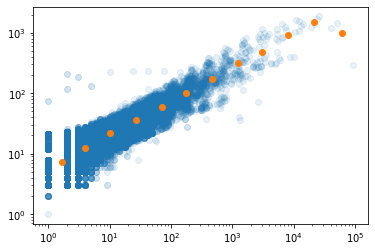

In [52]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(blocks, pins, alpha = 0.1)
plt.scatter(bin_means[:,0], bin_means[:,1])

### Find rent exponent

In [53]:
log_bin_means = np.log(bin_means)

In [54]:
def trend_line(data):
    x = data[:,0]
    y = data[:,1]
    x_mean = x.mean()
    y_mean = y.mean()
    x_err = x-x_mean
    y_err = y-y_mean
    a = (x_err*y_err).sum()/ ((x_err)**2).sum()
    b = y_mean - x_mean*a
    first_point = [x[0], x[0]*a + b]
    last_point = [x[-1], x[-1]*a + b]
    
    #Error
    error = sum((y - (x*a + b))**2)/len(data)   
    
    return np.array([first_point, last_point]), a, b, error

In [55]:
trend_line(log_bin_means[:])

(array([[ 0.53167502,  2.14938848],
        [11.02040898,  7.60774327]]),
 0.5204016812923978,
 1.8727039045477922,
 0.0634876016874494)

In [56]:
int(n_bins/2)
n_selected_bins = 6
error_per_n_bins = [] ##Find the best error for sliding windows of selected number of bins
for n_selected_bins in range(int(3), n_bins+1):
    print(n_selected_bins)
    min_error = np.inf
    min_error_data = []
    for i in range(n_bins-n_selected_bins+1):
        line, slope, offset, error = trend_line(log_bin_means[i:i+n_selected_bins])
        if error < min_error:
            min_error = error
            min_error_data = log_bin_means[i:i+n_selected_bins]
    error_per_n_bins.append([n_selected_bins, min_error_data, min_error]) 
error_per_n_bins = np.array(error_per_n_bins, dtype=object)

3
4
5
6
7
8
9
10
11
12


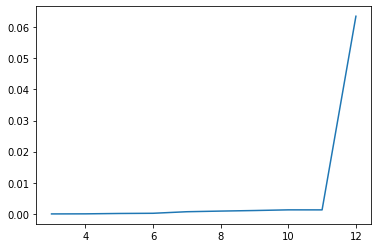

In [57]:
plt.plot(error_per_n_bins[:, 0], error_per_n_bins[:, -1])

In [58]:
error_per_n_bins[:, -1]

array([2.3656702284628372e-07, 2.3084518944006878e-05,
       0.0001409531968547212, 0.00020241826925331702,
       0.0007039509063945182, 0.0009086838208549404,
       0.0010887174368954958, 0.001304755845933559, 0.001297491254050468,
       0.0634876016874494], dtype=object)

In [62]:
##find best number of bins (to ommit rents first and second 'gebied' )
best_n_bins = 11 ## find this automatically ## find minimum and ... (? nog bedenken hoe juist)
selected_bins = error_per_n_bins[:,1][error_per_n_bins[:, 0] == best_n_bins][0]

trend_line(selected_bins)

(array([[0.53167502, 2.01638032],
        [9.95926279, 7.32327179]]),
 0.5629108528995665,
 1.7170946821939728,
 0.001297491254050468)

In [63]:
#Find best fit for 

0.5629108528995665


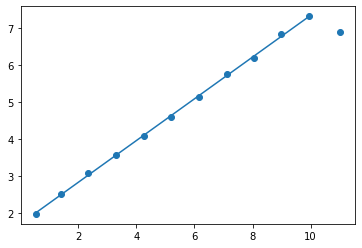

In [64]:
line, slope, offset, error = trend_line(selected_bins)
print(slope)
plt.scatter(log_bin_means[:,0], log_bin_means[:,1])

plt.plot(line[:,0], line[:,1])

In [65]:
trend_line(log_bin_means)

(array([[ 0.53167502,  2.14938848],
        [11.02040898,  7.60774327]]),
 0.5204016812923978,
 1.8727039045477922,
 0.0634876016874494)

In [66]:
trend_line(log_bin_means[1:-4])

(array([[1.39021415, 2.52047765],
        [7.12618881, 5.71632431]]),
 0.5571584335948216,
 1.7459081173537379,
 0.000932201513126011)

In [67]:
slope

0.5629108528995665

10 bins: 0.5845491182482381 

In [23]:
import pickle

In [28]:
# print(rent_data)
rent_data = [[[4,5], [9,10]], [[4,5], [9,10]]]
with open('test.rent', "wb") as fp:  # Pickling
    pickle.dump(rent_data, fp)

In [33]:
with open(os.path.join(bm_folder, 'rent', 'large.blif.rent'), "rb") as fp:   # Unpickling
    b = pickle.load(fp)

[[[8500, 499]],
 [[4025, 271], [4475, 339]],
 [[1816, 166], [2209, 247], [2195, 214], [2280, 266]],
 [[986, 109],
  [830, 115],
  [1210, 169],
  [999, 152],
  [1177, 113],
  [1018, 151],
  [1232, 182],
  [1048, 155]],
 [[475, 72],
  [511, 112],
  [390, 92],
  [440, 93],
  [546, 118],
  [664, 114],
  [501, 97],
  [498, 65],
  [644, 84],
  [533, 107],
  [541, 87],
  [477, 67],
  [604, 95],
  [628, 107],
  [570, 74],
  [478, 112]],
 [[221, 57],
  [254, 76],
  [267, 83],
  [244, 88],
  [175, 64],
  [215, 38],
  [220, 86],
  [220, 72],
  [295, 78],
  [251, 89],
  [301, 80],
  [363, 56],
  [273, 74],
  [228, 86],
  [264, 69],
  [234, 76],
  [347, 86],
  [297, 56],
  [240, 60],
  [293, 79],
  [270, 65],
  [271, 66],
  [252, 47],
  [225, 48],
  [302, 74],
  [302, 84],
  [314, 117],
  [314, 56],
  [285, 52],
  [285, 75],
  [242, 52],
  [236, 96]],
 [[111, 25],
  [110, 51],
  [127, 58],
  [127, 49],
  [121, 55],
  [146, 72],
  [122, 47],
  [122, 59],
  [91, 49],
  [84, 29],
  [103, 43],
  [112, 

In [31]:
os.path.split('/home/marieke/GNL_clone/benchmarks/blif/large.blif.rent')

('/home/marieke/GNL_clone/benchmarks/blif', 'large.blif.rent')